# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import stats
from numpy.random import seed
medical = pd.read_csv(r'C:\Users\34658\SPRINGBOARD\Frequentist Case Study\insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Appropiateness of the mean and std: 

The histogram below shows that the distribution of the sample is righ skewed and there are outliers (right end of the tail).

The std, in conjunction with the mean is used when there is continuous data. However, these statistics are only appropriate when the data (i) is not skewed, or (ii) does not have outliers.

In our sample, the std deviation is very high (almost equal to the mean), this tell us that the values are very disperse, the sample does not follow a Normal distribution.

As a result of this, **these statistics are not appropriate** for the data.

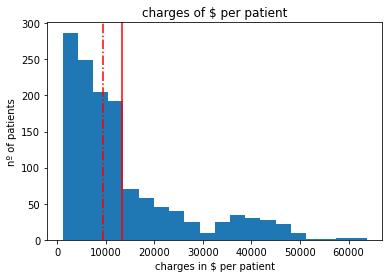

In [4]:
_ = plt.hist(medical.charges, bins = 20)
_ = plt.xlabel('charges in $ per patient')
_ = plt.ylabel('nº of patients')
_ = plt.title('charges of $ per patient')
#reflect some statistics in the graph
_ = plt.axvline(np.mean(medical.charges), color='r', linestyle='-')
_ = plt.axvline(np.median(medical.charges), color='r', linestyle='-.')

In [5]:
mean1 = round(np.mean(medical.charges), 2)
std1 = round(np.std(medical.charges), 2)
median1 = round(medical.charges.median(), 2)
print("mean:", mean1, "\nstd:", std1, "\nmedian:", median1)

mean: 13270.42 
std: 12105.48 
median: 9382.03


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

The mean charge is 13,270, a bit higher than 12,000.
The median charge is 9382, a bit lower than 12,000.

The most appropriate frequentist test would be to use the CLT to resample the means and derive a distribution of means. Based on this distribution, we will hypothesize the probability that the mean is < 12,000.

Below we make 100 samples of the charges, picking 50 patients on each sample, and calculate the mean of every sample:

In [6]:
m = medical.charges.to_numpy()

seed(47)
sample_mean = []

# calculate 100 means sampled from the larger dataset
for n in range(100):
    this_sample = np.random.choice(m, 50)
    sample_mean.append(np.mean(this_sample))

mean_of_means = np.mean(sample_mean)
std_of_means = np.std(sample_mean, ddof=1)

print("mean_resamples:", round(mean_of_means, 2), "\nstd_resamples:", round(std_of_means, 2))

mean_resamples: 13326.11 
std_resamples: 1475.77


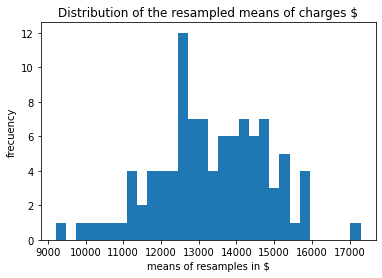

In [7]:
_ = plt.hist(sample_mean, bins=30)
_ = plt.xlabel('means of resamples in $')
_ = plt.ylabel('frecuency')
_ = plt.title('Distribution of the resampled means of charges $')

The graph above shows tha the resampled means are much more in line with what we would expect to see for a Normal Distribution. The mean of charges has not changed a lot, but the std has narrowed significantly. 

Based on this std, we will calculate the probability of a mean value < 12,000.

In [8]:
norm.cdf(12000, loc = mean_of_means, scale = std_of_means)

0.18443638742417123

Using the cdf function, we calculate how much probability lays below a mean of 12,000 in our distribution, considering a mean = resampled mean and an std = std of the resampled means.

The result is that the probability that the population mean is less than 12,000 is 18.84%, which is already a pointer that the Administrator may be making a wrong assumption.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In this case, our problem revolves around testing the hypothesis that a value for the mean is lower than a value. Therefore, we will use the one-sided confidence interval.

The critical z value for a 95% confidence interval is 1.96.

margin of error = (critical value * pop std dev)

ci = mean +/- (margin of error / sqrt(sample size))

In [9]:
z = 1.96
std_dev = 1476
sample_size = 1338
mean = 13326

ci = (z * std_dev) / np.sqrt(sample_size)

print ((mean - ci),  "<",  mean, "<", (mean + ci))

13246.911311813235 < 13326 < 13405.088688186765


The administrator should not be concerned because, in line with a confidence level of 95%, the average charge is estimated to fall 95% of the times above a minimum of 13,246, much higher than the 12,000 they hypothesized.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

The null hypothesis is that there is no difference between people with insurance and people without insurance, that the average charge is the same.

The alternative hypothesis is that the administrator's fears are true and people with insurance are charged more (or less) than those without insurance.

"What assumption about the variances of the two groups are we making here?" We're assuming that the variance is roughly the same and we can combine these two groups (pool the standard deviations) in this way.

One-Sample T-Test tests if the mean of a normally distributed population is different from a specified value.

* Null Hypothesis: states that the population mean is equal to some value.
* Alternative Hypothesis: states that the mean does not equal/is greater than/is less than some value.

But we don't have a normally distributed population. But maybe yes, if we use he CLT and the mean we got from resampling.

In [10]:
n = len(medical.charges)
dof = n - 1
p = 0.95
critical_value = t.ppf(p, dof)
std_dev = 1476
mean = 13326

print("critical value", critical_value)
ci = ((critical_value * std_dev) / np.sqrt(n))
print(mean - ci, "<", mean, "<", mean + ci)

critical value 1.6459941145571317
13259.581879957419 < 13326 < 13392.418120042581


What if we pretend that we believe the original dataset is normally distributed?

(The following exercise appears to assume we should have believed this.)

In [11]:
ci2 = critical_value * medical.charges.std() / np.sqrt(n) 

# Lower bound
medical.charges.mean() - ci2

12725.48718381623

The t test (also called Student's T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

If p-value is less than the predetermined value of significance, reject null hypothesis and accept alternative hypothesis.

If we just want a yes or no answer, we can do this.

In [12]:
# Null Hypothesis: the population mean is equal to 12000

stats.ttest_1samp(medical.charges, 12000)

Ttest_1sampResult(statistic=3.8373517196585314, pvalue=0.000130171652092872)

The pvalue is very small and 1/2 the pvalue would be smaller, so I'd say the mean is not 12000.

Can we use any of this info to give us an idea of what it thinks the 95% confidence interval is?

Yes, with the formulae below:

mean +/- t*(s/sqrt(n))

The t-statistic is related to the critical value.

If the statistic is less than or equal to the critical value, we fail to reject the null hypothesis (e.g. no effect). Otherwise it is rejected.

So, if the t-statistic is larger than the critical value, it means that the mean we pushed through the function is outside the confidence interval we asked for. In other words, the critical value can give us a range; the test statistic gives us a yes/no answer.

In [13]:
null_hypothesis = "the mean is 12000"
print ("The calculated critical value is", critical_value)
t_statistic, pvalue = stats.ttest_1samp(medical.charges, 12000)
print ("The calculated t-statistic is", t_statistic)

if (t_statistic <= critical_value):
    # fail to reject the null hypohesis
    print("We cannot reject the hypothesis that", null_hypothesis)
else:
    # reject the null hypothesis
     print("We reject the hypothesis that", null_hypothesis)

The calculated critical value is 1.6459941145571317
The calculated t-statistic is 3.8373517196585314
We reject the hypothesis that the mean is 12000


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

For a lower-tailed test, the p-value is equal to this probability; p-value = cdf(ts).

For an upper-tailed test, the p-value is equal to one minus this probability; p-value = 1 - cdf(ts).

For a two-sided test, the p-value is equal to two times the p-value for the lower-tailed p-value if the value of the test statistic from your sample is negative. However, the p-value is equal to two times the p-value for the upper-tailed p-value if the value of the test statistic from your sample is positive.

In [14]:
# not insured
ins0 = medical.loc[medical.insuranceclaim == 0]

# not insured
ins1 = medical.loc[medical.insuranceclaim == 1]

In [15]:
n0 = len(ins0)
s0 = (ins0.charges.std())
x0 = (ins0.charges.mean())

n1 = len(ins1)
s1 = (ins1.charges.std())
x1 = (ins1.charges.mean())

print("uninsured\n", "count", n0, "mean", x0, "std. dev.", s0)
print("\n")
print("insured\n", "count", n1, "mean", x1, "std. dev.", s1)

a = (n0 - 1)*s0**2
b = (n1 - 1)*s1**2

dof = (n0 + n1 - 2)

sp = np.sqrt((a + b)/dof)

print("dof:", dof, "sp:", sp)

t_stat = ((x0 - x1)/(sp*(np.sqrt(1/n0 + 1/n1))))

print("\nt stat:", t_stat)

uninsured
 count 555 mean 8821.421892306294 std. dev. 6446.510126811736


insured
 count 783 mean 16423.928276537663 std. dev. 14045.928418802127
dof: 1336 sp: 11520.034268775256

t stat: -11.89329903087671


In [16]:
cdf = t.cdf(t_stat,df=dof)

# For a two-sided test, if the value of the test statistic from 
# your sample is negative, then the p-value is equal to 
# two times the p-value for the lower-tailed p-value 
# (i.e. 2 * cdf(ts))
# 
p_val = 2 * cdf    

print("p value:", p_val)

p value: 4.461230231620972e-31


In [17]:
# using the appropriate function from scipy.stats
# Calculate the T-test for the means of two independent samples.
# stats.ttest_ind
# This is a two-sided test for the null hypothesis that 2 independent
# samples have identical average (expected) values. This test assumes
# that the populations have identical variances by default.

t_stat, p_val = stats.ttest_ind(ins0.charges, ins1.charges)
print("t stat:", t_stat, "p value:", p_val)

t stat: -11.893299030876712 p value: 4.461230231620717e-31


A large t-score tells you that the groups are different.
A small t-score tells you that the groups are similar.

Is -11.9 "small"? 4.46e-31 is essentially 0.

Or is 11 large?

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

A: scipy stats has a zscore method.

scipy.stats.zscore(a, axis=0, ddof=0)[source]
Calculates the z score of each value in the sample, relative to the sample mean 
and standard deviation.

The statsmodel package has this:

statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)[source]
test for mean based on normal distribution, one or two samples

In [18]:
cdf = t.cdf(t_stat,df=dof)

# For a two-sided test, if the value of the test statistic from 
# your sample is negative, then the p-value is equal to 
# two times the p-value for the lower-tailed p-value 
# (i.e. 2 * cdf(ts))
# 
p_val = 2 * cdf    

print("p value:", p_val)

p value: 4.461230231620717e-31


In [19]:
# using the appropriate function from scipy.stats
# Calculate the T-test for the means of two independent samples.
# stats.ttest_ind
# This is a two-sided test for the null hypothesis that 2 independent
# samples have identical average (expected) values. This test assumes
# that the populations have identical variances by default.

t_stat, p_val = ttest_ind(ins0.charges, ins1.charges)
print("t stat:", t_stat, "p value:", p_val)

t stat: -11.893299030876712 p value: 4.461230231620717e-31


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test